# House Prices Project

##### Libraries that are used

In [181]:
#libraries
import pandas as pd
import numpy as np
import copy
import requests
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from bs4 import BeautifulSoup


##### Data collection by scrapping Leboncoin


In [8]:
#scrapping data from the web (Leboncoin)

# Leboncoin searching url (Paris houses)
url = "https://www.leboncoin.fr/recherche?category=10&locations=Paris"

headers = {
    "User-Agent": "Safari/18.3"
}

# HTTP request
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Posts Extraction
annonces = soup.find_all("div", class_="ad")

data = []
for annonce in annonces:
    titre = annonce.find("h2").text if annonce.find("h2") else "N/A"
    prix = annonce.find("span", class_="price").text if annonce.find("span", class_="price") else "N/A"
    lien = annonce.find("a")["href"] if annonce.find("a") else "N/A"
    data.append([titre, prix, lien])

# Saving to a DataFrame
df = pd.DataFrame(data, columns=["Titre", "Prix", "Lien"])
df.to_csv("posts_houses.csv", index=False)
print(df.head())

Empty DataFrame
Columns: [Titre, Prix, Lien]
Index: []



##### Data collection from _data.gouv.fr_


In [158]:
# Url to houses data (https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/#/resources)
df = pd.read_csv('house-prices.txt', sep ='|', low_memory=False)
df.to_csv('house-prices.csv', index = None)
df.info()

# Drop NaN values columns
df1= pd.DataFrame(df.drop (columns = [' =Identifiant de document','Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'B/T/Q', 'Prefixe de section','No Volume','1er lot','Surface Carrez du 1er lot','2eme lot','Surface Carrez du 2eme lot','2eme lot','Surface Carrez du 3eme lot','3eme lot','Surface Carrez du 4eme lot','4eme lot','Surface Carrez du 5eme lot','5eme lot','Identifiant local','Nature culture speciale']))
df1.to_csv("all_prices.csv", index=False)

# Dataset description
df1.info()
df1.shape
print(df1.isnull().sum())
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566643 entries, 0 to 1566642
Data columns (total 43 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0    =Identifiant de document   0 non-null        float64
 1   Reference document          0 non-null        float64
 2   1 Articles CGI              0 non-null        float64
 3   2 Articles CGI              0 non-null        float64
 4   3 Articles CGI              0 non-null        float64
 5   4 Articles CGI              0 non-null        float64
 6   5 Articles CGI              0 non-null        float64
 7   No disposition              1566643 non-null  int64  
 8   Date mutation               1566643 non-null  object 
 9   Nature mutation             1566643 non-null  object 
 10  Valeur fonciere             1549589 non-null  object 
 11  No voie                     946773 non-null   float64
 12  B/T/Q                       67087 non-null    object 
 1

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,02/01/2024,Vente,"346,50",NaN,NaN,B020,LE DELIVRE,1230.0,CHALEY,...,76,B,514,0,NaN,NaN,NaN,NaN,P,99.0
1,2,03/01/2024,Vente,"10000,00",NaN,NaN,B007,CHEVRY DESSOUS,1170.0,CHEVRY,...,103,B,1782,0,NaN,NaN,NaN,NaN,S,115.0
2,1,08/01/2024,Vente,"249000,00",NaN,NaN,B086,PIN HAMEAU,1290.0,LAIZ,...,203,C,1065,0,NaN,NaN,NaN,NaN,S,497.0
3,1,03/01/2024,Vente,"329500,00",29.0,PL,0500,DU JURA,1170.0,GEX,...,173,AI,551,2,3.0,Dépendance,0.0,0.0,NaN,NaN
4,1,03/01/2024,Vente,"329500,00",29.0,PL,0500,DU JURA,1170.0,GEX,...,173,AI,551,2,3.0,Dépendance,0.0,0.0,NaN,NaN


In [203]:
# Correction
df1 = df1.dropna(subset=["Surface reelle bati"])
df1.head(10)
df1.shape
print(df1.isnull().sum())

No disposition                    0
Date mutation                     0
Nature mutation                   0
Valeur fonciere                   0
No voie                        5080
Type de voie                  80637
Code voie                         0
Voie                              5
Code postal                      93
Commune                           0
Code departement                  0
Code commune                      0
Section                          36
No plan                           0
Nombre de lots                    0
Code type local                   0
Type local                        0
Surface reelle bati               0
Nombre pieces principales         0
Nature culture               410997
Surface terrain              410997
dtype: int64


In [204]:
# Dataset selection
sample = df1.sample(n=20000, random_state=42)
sample.to_csv("sample.csv", index=False)
sample.shape
sample.dtypes

No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere              float64
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
dtype: object

In [ ]:
# Remplacer les éventuels caractères non numériques (€, espaces, virgules)
sample["Valeur fonciere"] = sample["Valeur fonciere"].str.replace(",", ".", regex=True)  # Remplacer les virgules par des points (format float)
sample["Valeur fonciere"] = sample["Valeur fonciere"].str.replace(" ", "", regex=True)  # Supprimer les espaces

# Convertir en float
sample["Valeur fonciere"] = pd.to_numeric(sample["Valeur fonciere"], errors="coerce")

# Vérifier la conversion
print(sample["Valeur fonciere"].dtype)  # Doit afficher "float64"
print(sample["Valeur fonciere"].head(5))  # Aperçu des données après conversion
sample.head(5)

In [206]:
# Final dataset
sample.to_csv("houses_dataset.csv", index=False)
sample.dtypes

No disposition                 int64
Date mutation                 object
Nature mutation               object
Valeur fonciere              float64
No voie                      float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
dtype: object

In [144]:
# Replace missed values
#dataset=pd.DataFrame(df1.fillna('Not defined'))
#dataset.to_csv("houses_dataset.csv", index=False)
#dataset.head(10)

In [98]:
#dataset['Valeur fonciere']=dataset['Valeur fonciere'].str.replace("€", "").str.replace(" ", "").astype(string)
#dataset.head()
#df["Prix"] = df["Prix"].str.replace("€", "").str.replace(" ", "").astype(float)

In [207]:
sample["Prix au m2"] = sample["Valeur fonciere"] / sample["Surface reelle bati"]
print(sample.head)

<bound method NDFrame.head of          No disposition Date mutation Nature mutation  Valeur fonciere  \
622445                1    09/02/2024           Vente         510800.0   
1146702               1    02/04/2024           Vente         120000.0   
475947                1    23/04/2024           Vente          23000.0   
1524650               1    30/04/2024           Vente         180953.0   
1317700               1    11/01/2024           Vente         340000.0   
...                 ...           ...             ...              ...   
386944                1    14/02/2024           Vente         327000.0   
1457293               2    30/01/2024           Vente          63000.0   
1056675               1    22/03/2024         Echange          10000.0   
720394                1    22/02/2024           Vente         315000.0   
309252                1    16/05/2024           Vente         260000.0   

         No voie Type de voie Code voie              Voie  Code postal  \
622445 

In [208]:
sample.to_csv("houses_dataset.csv", index=False)

In [209]:
# Correction
#sample.replace([np.inf, -np.inf], np.nan, inplace=True)
sample = sample.dropna(subset=["Surface reelle bati"])
sample.head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,Prix au m2
622445,1,09/02/2024,Vente,510800.0,4.0,IMP,0028,DE LA CHARTREUSE,38790.0,SAINT-GEORGES-D'ESPERANCHE,...,AR,610,0,3.0,Dépendance,0.0,0.0,S,1500.0,inf
1146702,1,02/04/2024,Vente,120000.0,2.0,RUE,3090,SAINT PAUL,74960.0,ANNECY,...,AI,130,1,3.0,Dépendance,0.0,0.0,NaN,NaN,inf
475947,1,23/04/2024,Vente,23000.0,7.0,RUE,0119,NATIONALE,31210.0,MONTREJEAU,...,C,176,1,3.0,Dépendance,0.0,0.0,NaN,NaN,inf
1524650,1,30/04/2024,Vente,180953.0,9.0,RUE,0880,SAINTE ROSE,97410.0,SAINT PIERRE,...,DS,513,1,2.0,Appartement,72.0,3.0,NaN,NaN,2513.236111
1317700,1,11/01/2024,Vente,340000.0,1044.0,RTE,0292,DE PERNES,84170.0,MONTEUX,...,B,175,0,1.0,Maison,131.0,4.0,T,4340.0,2595.419847
59333,1,12/01/2024,Vente,145000.0,27.0,CHE,6364,DE TERRON,6200.0,NICE,...,NI,191,1,3.0,Dépendance,0.0,0.0,NaN,NaN,inf
1445572,1,21/02/2024,Vente,435000.0,96.0,AV,9635,VICTOR HUGO,92170.0,VANVES,...,I,126,1,2.0,Appartement,64.0,3.0,NaN,NaN,6796.875000
1122441,1,28/06/2024,Vente,120000.0,5118.0,NaN,B922,LE PRESSOIR,72290.0,MEZIERES SUR PONTHOUIN,...,A,140,0,3.0,Dépendance,0.0,0.0,S,3479.0,inf
1328277,1,13/06/2024,Vente,120000.0,393.0,RTE,0022,TOURIST.DE CABRIERES RD100,84800.0,LAGNES,...,B,117,0,1.0,Maison,29.0,2.0,VE,1260.0,4137.931034
1125053,1,29/01/2024,Vente,87300.0,590.0,RUE,0066,DES BETTETS,73500.0,MODANE,...,F,1567,2,3.0,Dépendance,0.0,0.0,NaN,NaN,inf



##### Exploratory Data Analysis (EDA)


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


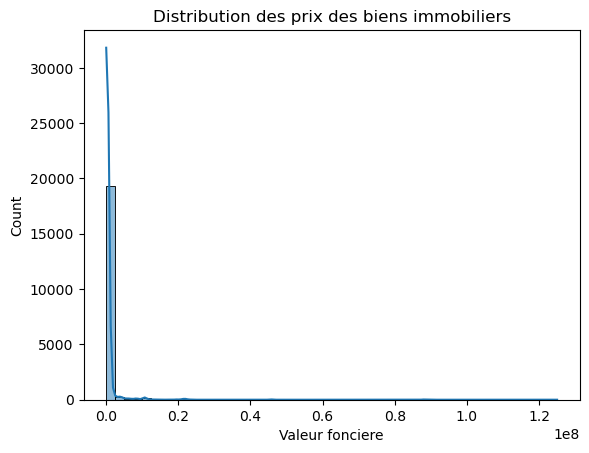

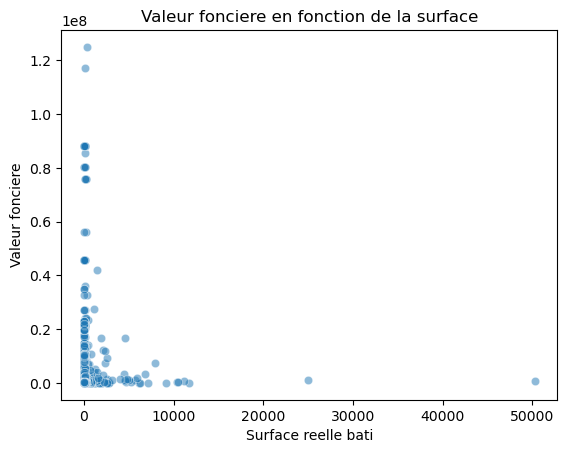

In [210]:
# Distribution des prix
sns.histplot(sample["Valeur fonciere"], bins=50, kde=True)
plt.title("Distribution des prix des biens immobiliers")
plt.show()

# Relation Prix vs Surface
sns.scatterplot(x=sample["Surface reelle bati"], y=sample["Valeur fonciere"], alpha=0.5)
plt.title("Valeur fonciere en fonction de la surface")
plt.show()

##### Modelization and price predictions 

In [211]:
# Sélection des features et target
X = sample[["Surface reelle bati", "Nombre pieces principales"]]
y = sample["Valeur fonciere"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE : {mae}€")


MAE : 881354.3493463802€


##### Prediction visualization

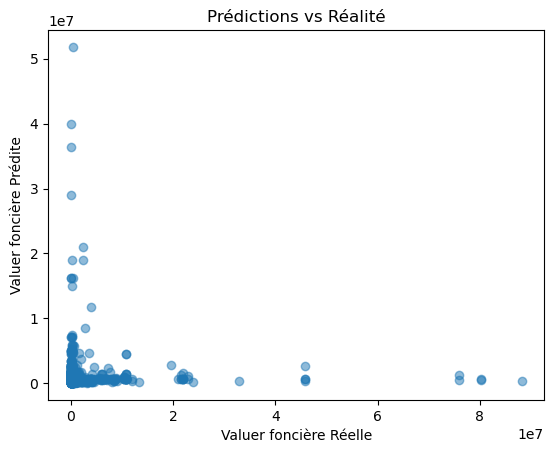

In [212]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valuer foncière Réelle")
plt.ylabel("Valuer foncière Prédite")
plt.title("Prédictions vs Réalité")
plt.show()